In [1]:
import pandas as pd
import numpy as np

In [2]:
advt = pd.read_csv("F:/JupyterML/ML_Practice/datasets/Advertising.csv")

In [3]:
advt.head(4)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5


In [4]:
advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
advt = advt[["TV", "radio", "newspaper", "sales"]]

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
  advt[["TV", "radio", "newspaper"]],
  advt.sales,
  test_size=0.3,
  random_state = 42 )

In [9]:
len( X_train )

140

In [10]:
len( X_test )

60

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linreg = LinearRegression()
linreg.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
linreg.intercept_

2.70894909251591

In [14]:
list( zip( ["TV", "Radio", "Newspaper"], list( linreg.coef_ ) ) )

[('TV', 0.0440592809574652),
 ('Radio', 0.19928749689893954),
 ('Newspaper', 0.006882452222275456)]

In [15]:
y_pred = linreg.predict( X_test )

In [16]:
test_pred_df = pd.DataFrame( { 'actual': y_test,
                            'predicted': np.round( y_pred, 2),
                            'residuals': y_test - y_pred } )

In [17]:
test_pred_df[0:10]

,actual,predicted,residuals
95,16.9,16.57,0.334604
15,22.4,21.19,1.211772
30,21.4,21.55,-0.151071
158,7.3,10.89,-3.589238
128,24.7,22.20,2.497680
115,12.6,13.36,-0.755569
69,22.3,21.20,1.103075
170,8.4,7.35,1.049715
174,11.5,13.28,-1.775471
45,14.9,15.12,-0.224495


In [18]:
from sklearn import metrics

In [19]:
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )

In [20]:
round( rmse, 2 )

1.95

In [21]:
metrics.r2_score( y_test, y_pred )

0.8609466508230368

In [22]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib

Using matplotlib backend: Qt5Agg


In [23]:
residuals = y_test - y_pred

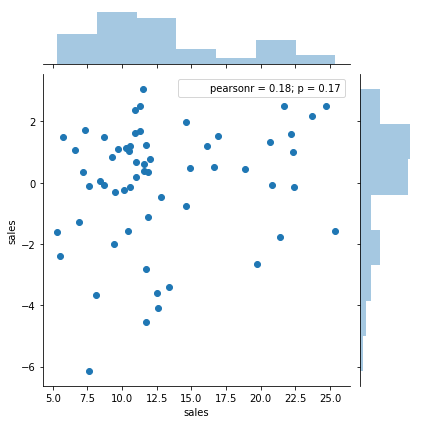

In [25]:
sn.jointplot(  advt.sales, residuals, size = 6 )

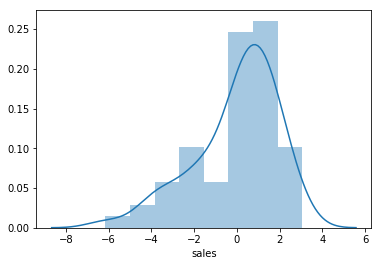

In [26]:
sn.distplot( residuals )

In [27]:
X_train['tv_radio'] = X_train.TV * X_train.radio
X_test['tv_radio'] = X_test.TV * X_test.radio

In [28]:
linreg = LinearRegression()
linreg.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_pred = linreg.predict( X_test )

In [30]:
metrics.r2_score(y_test, y_pred)

0.9661335713236504

In [32]:
residuals = y_test - y_pred

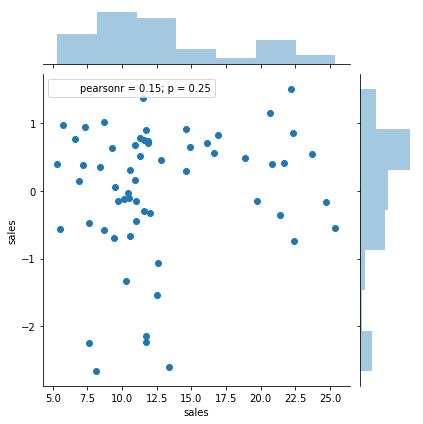

In [34]:
sn.jointplot( advt.sales, residuals, size = 6 )

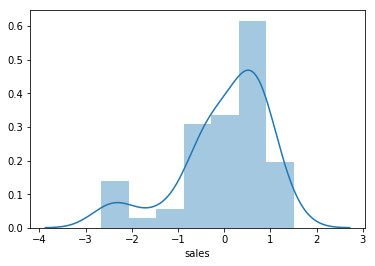

In [35]:
sn.distplot( residuals )

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
linreg = LinearRegression()

In [38]:
cv_scores = cross_val_score( linreg, X_train, y_train, scoring = 'r2', cv = 10 )
cv_scores

array([0.95903494, 0.9876863 , 0.95936288, 0.9869768 , 0.94930993,
       0.98115182, 0.96756731, 0.98532576, 0.83492477, 0.96338315])

In [39]:
print( "Average r2 score: ", np.round( np.mean( cv_scores ), 2 ) )
print( "Standard deviation in r2 score: ", np.round( np.std( cv_scores ), 2) )

Average r2 score:  0.96
Standard deviation in r2 score:  0.04


In [40]:
from sklearn.feature_selection import SelectKBest, f_regression

In [41]:
model = SelectKBest( score_func=f_regression, k=4 )

In [42]:
results = model.fit( X_train, y_train )

In [43]:
results.scores_

array([ 185.64138393,   88.09887658,    8.83792204, 1681.74689385])

In [44]:
results.pvalues_

array([2.55193304e-27, 1.72271169e-16, 3.48260999e-03, 3.62229342e-79])

In [46]:
['%.3f' % p for p in results.pvalues_]

['0.000', '0.000', '0.003', '0.000']

In [48]:
linreg = LinearRegression()
linreg.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
import pickle

In [50]:
from sklearn.externals import joblib
joblib.dump(linreg, 'lin_model.pkl', compress=9)

['lin_model.pkl']

In [51]:
model_clone = joblib.load('lin_model.pkl')

In [52]:
model_clone.intercept_

6.2827413679807265

In [53]:
model_clone.coef_

array([0.02065759, 0.04560647, 0.00444591, 0.00100427])

In [54]:
pred_y = model_clone.predict( X_test )

In [55]:
pred_y

array([16.51481467, 22.09026935, 22.14057486,  8.84184398, 23.92339093,
       12.30438665, 22.44255921,  8.50893959, 11.84968485, 15.02266624,
        8.84336758,  8.15740741, 12.45972896,  7.96186729,  9.67271205,
       11.64412385,  8.10515071, 16.11420252, 10.44368461, 19.04634023,
       20.27116741, 12.3514422 , 10.49652214, 22.64879825,  8.78069932,
        7.68173512, 22.02422583, 11.89546896,  9.77074649,  7.93555395,
       11.14465835, 10.15320262, 22.77890665,  9.76400776, 16.79816219,
       20.9964258 , 11.74159991, 21.46390992, 11.12843768,  7.06001376,
       10.0299098 , 12.04486459,  9.70251605,  9.01404596, 11.62875112,
        7.44390286,  9.78669179, 14.03603296,  9.45518971, 11.29144615,
       13.8613338 , 11.34294353,  9.45330984,  8.74764177,  8.02464711,
       10.09567985,  9.88480395, 26.73071653,  8.07554435, 11.24509079])

In [58]:
y_test[0:10]

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
Name: sales, dtype: float64